In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn import svm

The classifications are:

| Type | Class |
| :-: | :-: |
| 1 | Building windows that are float processed |
| 2 | Building windows that are not float processed |
| 3 | Vehicle windows that are float processed |
| 4 | Vehicle windows that are not float processed |
| 5 | Containers |
| 6 | Tableware |
| 7 | Headlamps |

## PREPROCESSING

This section details our methodology for preprocessing the data. 

In [2]:
#importing dataset
uk = 'glass_uk.csv'
data_uk = pd.read_csv(uk)
data_uk

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Date Collected,UUID
0,0,1.52213,0.00,3.82,0.47,71.77,0.11,NaN,0.00,0.00,1,04/08/06,115b4d
1,1,1.51994,13.27,0.00,0.00,NaN,0.47,0.00,0.00,0.00,5,06/03/06,c03fd8
2,2,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2,05/01/92,c8f697
3,3,1.51831,14.39,0.00,1.82,72.86,1.41,0.00,2.88,0.00,7,23/06/08,a821c4
4,4,1.52667,0.00,0.00,0.71,71.57,0.02,0.00,0.00,0.00,1,07/03/06,f5d41d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64,0.00000,12.89,3.62,1.57,72.96,0.61,NaN,0.00,0.00,2,17/11/97,9e3a55
65,65,1.51321,13.00,NaN,3.02,70.70,6.21,0.00,0.00,0.00,5,22/10/90,120f67
66,66,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.00,0.21,2,04/06/08,1052bc
67,67,1.52127,14.32,3.90,NaN,71.50,0.00,9.49,0.00,0.00,3,07/02/10,dd38fe


(array([23., 22.,  8.,  0.,  3.,  3., 10.]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 7 artists>)

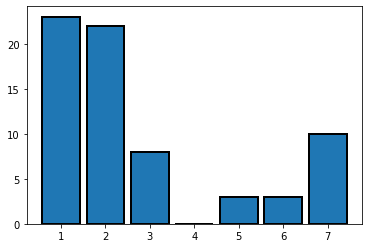

In [3]:
#visualising data (glass types)
fig, axis =plt.subplots()
axis.hist(data_uk['Type'], bins=[1,2,3,4,5,6,7,8], align='left', edgecolor='black', linewidth=2, rwidth=0.85)


In [4]:
#preprocessing data

# make copy of original data
data_uk_copy = data_uk.copy()

#removing columns that do not serve any purpose
data_uk_removed=data_uk_copy.drop(['Unnamed: 0','RI', 'Date Collected', 'UUID'],axis=1)

#printing new data
data_uk_removed


,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.00,3.82,0.47,71.77,0.11,NaN,0.00,0.00,1
1,13.27,0.00,0.00,NaN,0.47,0.00,0.00,0.00,5
2,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14,2
3,14.39,0.00,1.82,72.86,1.41,0.00,2.88,0.00,7
4,0.00,0.00,0.71,71.57,0.02,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
64,12.89,3.62,1.57,72.96,0.61,NaN,0.00,0.00,2
65,13.00,NaN,3.02,70.70,6.21,0.00,0.00,0.00,5
66,12.93,3.54,1.62,72.96,0.64,8.03,0.00,0.21,2
67,14.32,3.90,NaN,71.50,0.00,9.49,0.00,0.00,3


We removed columns we felt would not help us identify a specific glass.

In [5]:
#pre-processing data
#identify missing data
data_uk_removed.isnull().sum()

Na       6
Mg      11
Al       3
Si       5
K        3
Ca       8
Ba       8
Fe       5
Type     0
dtype: int64

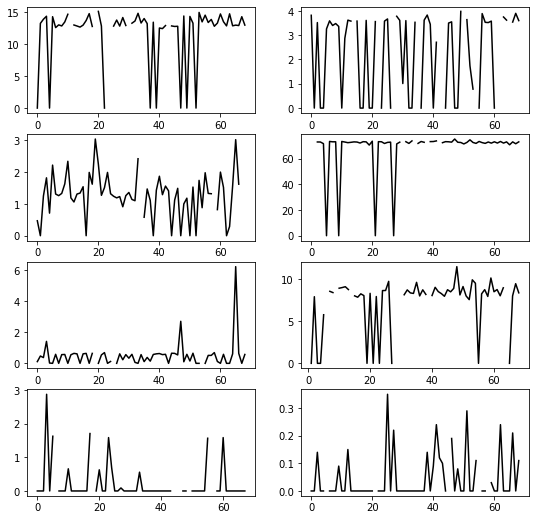

In [6]:
x = np.arange(0, 69, 1)
fig, ax = plt.subplots(4,2, figsize=(9, 9))
#ax.set_xlabel('x')
#ax.set_ylabel('element')
ax[0][0].plot(x, data_uk_removed['Na'], 'k-')
ax[0][1].plot(x, data_uk_removed['Mg'], 'k-')
ax[1][0].plot(x, data_uk_removed['Al'], 'k-')
ax[1][1].plot(x, data_uk_removed['Si'], 'k-')
ax[2][0].plot(x, data_uk_removed[ 'K'], 'k-')
ax[2][1].plot(x, data_uk_removed['Ca'], 'k-')
ax[3][0].plot(x, data_uk_removed['Ba'], 'k-')
ax[3][1].plot(x, data_uk_removed['Fe'], 'k-')


We plotted the data to get an idea of whether the values were in the correct range, this helped us to identify there were missing values for silicon.

In [7]:
#pre-processing data
#replacing missing data

#turn into dataframe
df=pd.DataFrame(data_uk_removed)

#All glass must contain silicon so value with 0 replaced with average
#all other values within a respectable range
df1 = df.copy()
df1['Si']=df1['Si'].replace(0,df1['Si'].mean())
df1.head(10)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.00,3.82,0.47,71.770000,0.11,NaN,0.00,0.00,1
1,13.27,0.00,0.00,NaN,0.47,0.00,0.00,0.00,5
2,13.92,3.52,1.25,72.880000,0.37,7.94,0.00,0.14,2
3,14.39,0.00,1.82,72.860000,1.41,0.00,2.88,0.00,7
4,0.00,0.00,0.71,71.570000,0.02,0.00,0.00,0.00,1
5,14.32,3.26,2.22,68.112813,0.00,5.79,1.63,NaN,7
6,12.61,3.59,1.31,73.290000,0.58,NaN,NaN,0.00,1
7,13.04,3.40,1.26,73.010000,0.00,8.58,0.00,0.00,3
8,12.87,3.48,1.33,73.040000,0.56,8.43,0.00,0.00,1
9,13.50,3.36,1.63,68.112813,0.57,NaN,0.00,0.09,3


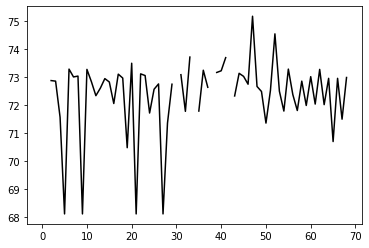

In [8]:
#check values have been replaced
fig, ax = plt.subplots()
x = np.arange(0, 69, 1)
ax.plot(x, df1['Si'], 'k-')

In [9]:
#visualise data
df1.head(35)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.00,3.82,0.47,71.770000,0.11,NaN,0.00,0.00,1
1,13.27,0.00,0.00,NaN,0.47,0.00,0.00,0.00,5
2,13.92,3.52,1.25,72.880000,0.37,7.94,0.00,0.14,2
3,14.39,0.00,1.82,72.860000,1.41,0.00,2.88,0.00,7
4,0.00,0.00,0.71,71.570000,0.02,0.00,0.00,0.00,1
5,14.32,3.26,2.22,68.112813,0.00,5.79,1.63,NaN,7
6,12.61,3.59,1.31,73.290000,0.58,NaN,NaN,0.00,1
7,13.04,3.40,1.26,73.010000,0.00,8.58,0.00,0.00,3
8,12.87,3.48,1.33,73.040000,0.56,8.43,0.00,0.00,1
9,13.50,3.36,1.63,68.112813,0.57,NaN,0.00,0.09,3


In [10]:
df1.tail(35)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
34,13.33,3.53,NaN,NaN,0.56,8.33,0.00,0.00,3
35,14.03,NaN,0.58,71.79,0.11,9.65,0.00,0.00,3
36,13.24,0.00,1.47,73.25,0.38,8.03,0.00,0.00,2
37,0.00,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1
38,13.46,3.83,0.00,NaN,0.57,8.21,0.00,0.14,2
39,0.00,3.45,1.43,73.17,0.61,NaN,0.00,0.00,2
40,12.55,0.00,1.87,73.23,0.63,8.08,0.00,0.09,2
41,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1
42,12.93,NaN,1.56,NaN,0.58,8.55,0.00,0.12,2
43,NaN,NaN,1.41,72.33,0.00,8.31,0.00,0.10,2


In [11]:
#use mean values to replace NaN values


uk_mean_values = {

    'Na': df1['Na'].mean(),

    'Mg': df1['Mg'].mean(),

    'Al': df1['Al'].mean(),

    'Si': df1['Si'].mean(),

    'K':   df1['K'].mean(),

    'Ca': df1['Ca'].mean(),

    'Ba': df1['Ba'].mean(),

    'Fe': df1['Fe'].mean(),

   }

df2 = df1.copy().fillna(value=uk_mean_values)
print(f'Data with NaN replaced by the mean:\n\n{df2}\n') 

Data with NaN replaced by the mean:

       Na        Mg        Al         Si     K       Ca        Ba    Fe  Type
0    0.00  3.820000  0.470000  71.770000  0.11  7.32541  0.000000  0.00     1
1   13.27  0.000000  0.000000  72.369863  0.47  0.00000  0.000000  0.00     5
2   13.92  3.520000  1.250000  72.880000  0.37  7.94000  0.000000  0.14     2
3   14.39  0.000000  1.820000  72.860000  1.41  0.00000  2.880000  0.00     7
4    0.00  0.000000  0.710000  71.570000  0.02  0.00000  0.000000  0.00     1
..    ...       ...       ...        ...   ...      ...       ...   ...   ...
64  12.89  3.620000  1.570000  72.960000  0.61  7.32541  0.000000  0.00     2
65  13.00  2.271724  3.020000  70.700000  6.21  0.00000  0.000000  0.00     5
66  12.93  3.540000  1.620000  72.960000  0.64  8.03000  0.000000  0.21     2
67  14.32  3.900000  1.274394  71.500000  0.00  9.49000  0.000000  0.00     3
68  13.00  3.600000  1.360000  72.990000  0.57  8.40000  0.222951  0.11     1

[69 rows x 9 columns]



Now we knew the values were all in an appropriate range we could replace the null values with the average of each column

In [12]:
#check null values replaced
df2.head(10)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.00,3.82,0.47,71.770000,0.11,7.32541,0.000000,0.000000,1
1,13.27,0.00,0.00,72.369863,0.47,0.00000,0.000000,0.000000,5
2,13.92,3.52,1.25,72.880000,0.37,7.94000,0.000000,0.140000,2
3,14.39,0.00,1.82,72.860000,1.41,0.00000,2.880000,0.000000,7
4,0.00,0.00,0.71,71.570000,0.02,0.00000,0.000000,0.000000,1
5,14.32,3.26,2.22,68.112813,0.00,5.79000,1.630000,0.045312,7
6,12.61,3.59,1.31,73.290000,0.58,7.32541,0.222951,0.000000,1
7,13.04,3.40,1.26,73.010000,0.00,8.58000,0.000000,0.000000,3
8,12.87,3.48,1.33,73.040000,0.56,8.43000,0.000000,0.000000,1
9,13.50,3.36,1.63,68.112813,0.57,7.32541,0.000000,0.090000,3


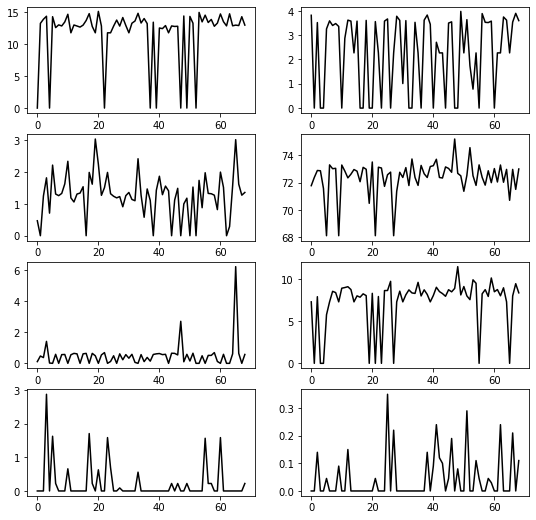

In [13]:
x = np.arange(0, 69, 1)
fig, ax = plt.subplots(4,2, figsize=(9, 9))

ax[0][0].plot(x, df2['Na'], 'k-')
ax[0][1].plot(x, df2['Mg'], 'k-')
ax[1][0].plot(x, df2['Al'], 'k-')
ax[1][1].plot(x, df2['Si'], 'k-')
ax[2][0].plot(x, df2[ 'K'], 'k-')
ax[2][1].plot(x, df2['Ca'], 'k-')
ax[3][0].plot(x, df2['Ba'], 'k-')
ax[3][1].plot(x, df2['Fe'], 'k-')

We then repeated these steps with the other two datasets.

In [14]:
# import with json because of file type
import json
with open('glass_us.json', 'r') as f:
    data_us = json.load(f)
    
us1=pd.DataFrame(data_us['FBI'])
us1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Date Collected,State
0,1.53393,0.00,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2.0,05-23-98,OK
1,0.00000,13.21,3.77,0.79,71.99,0.00,10.02,NaN,0.00,1.0,11-27-11,NJ
2,1.52152,0.00,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1.0,04-07-13,NV
3,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,NaN,7.0,11-02-88,IN
4,1.52065,14.36,0.00,2.02,73.42,0.00,0.00,NaN,0.00,7.0,04-16-11,MI
5,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5.0,07-08-11,LA
6,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1.0,02-24-06,KS
7,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00,2.0,10-06-98,TN
8,1.51779,0.00,3.65,0.00,73.00,0.06,8.93,0.00,0.00,3.0,05-27-17,MN
9,1.51806,13.00,3.80,1.08,73.07,0.56,0.00,0.00,0.00,2.0,08-04-98,DE


In [15]:
us1.to_csv("glass_us.csv",index=False)

us2=us1.drop(['RI', 'Date Collected', 'State'],axis=1)
us2

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.00,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2.0
1,13.21,3.77,0.79,71.99,0.00,10.02,NaN,0.00,1.0
2,0.00,3.65,0.87,72.22,0.19,9.85,0.00,0.17,1.0
3,14.37,0.00,2.74,72.85,0.00,9.45,0.54,NaN,7.0
4,14.36,0.00,2.02,73.42,0.00,0.00,NaN,0.00,7.0
5,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5.0
6,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1.0
7,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00,2.0
8,0.00,3.65,0.00,73.00,0.06,8.93,0.00,0.00,3.0
9,13.00,3.80,1.08,73.07,0.56,0.00,0.00,0.00,2.0


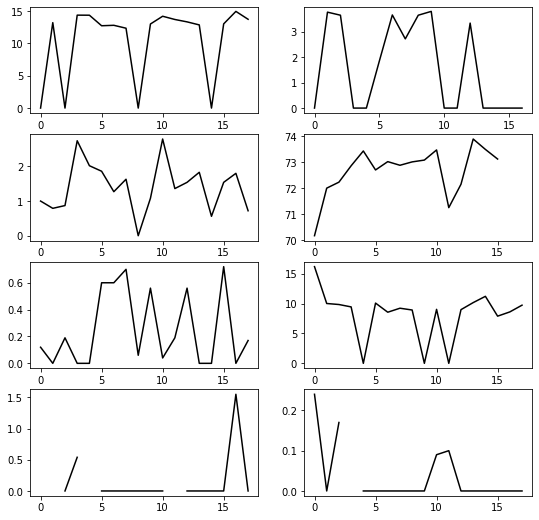

In [16]:
#visualising data

x = np.arange(0, 18, 1)
fig, ax = plt.subplots(4,2, figsize=(9, 9))

ax[0][0].plot(x, us2['Na'], 'k-')
ax[0][1].plot(x, us2['Mg'], 'k-')
ax[1][0].plot(x, us2['Al'], 'k-')
ax[1][1].plot(x, us2['Si'], 'k-')
ax[2][0].plot(x, us2[ 'K'], 'k-')
ax[2][1].plot(x, us2['Ca'], 'k-')
ax[3][0].plot(x, us2['Ba'], 'k-')
ax[3][1].plot(x, us2['Fe'], 'k-')

In [17]:
us_mean_values = {

    'Na': us1['Na'].mean(),

    'Mg': us1['Mg'].mean(),

    'Al': us1['Al'].mean(),

    'Si': us1['Si'].mean(),

    'K':   us1['K'].mean(),

    'Ca': us1['Ca'].mean(),

    'Ba': us1['Ba'].mean(),

    'Fe': us1['Fe'].mean(),

   }

us3 = us2.copy().fillna(value=us_mean_values)
print(f'Data with NaN replaced by the mean:\n\n{us3}\n')

Data with NaN replaced by the mean:

       Na        Mg    Al         Si     K     Ca        Ba        Fe  Type
0    0.00  0.000000  1.00  70.160000  0.12  16.19  0.000000  0.240000   2.0
1   13.21  3.770000  0.79  71.990000  0.00  10.02  0.139333  0.000000   1.0
2    0.00  3.650000  0.87  72.220000  0.19   9.85  0.000000  0.170000   1.0
3   14.37  0.000000  2.74  72.850000  0.00   9.45  0.540000  0.035294   7.0
4   14.36  0.000000  2.02  73.420000  0.00   0.00  0.139333  0.000000   7.0
5   12.73  1.850000  1.86  72.690000  0.60  10.09  0.000000  0.000000   5.0
6   12.80  3.660000  1.27  73.010000  0.60   8.56  0.000000  0.000000   1.0
7   12.35  2.720000  1.63  72.870000  0.70   9.23  0.000000  0.000000   2.0
8    0.00  3.650000  0.00  73.000000  0.06   8.93  0.000000  0.000000   3.0
9   13.00  3.800000  1.08  73.070000  0.56   0.00  0.000000  0.000000   2.0
10  14.20  0.000000  2.79  73.460000  0.04   9.04  0.000000  0.090000   7.0
11  13.70  0.000000  1.36  71.240000  0.19   0.00  

In [18]:
us3.head(10)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.00,0.00,1.00,70.16,0.12,16.19,0.000000,0.240000,2.0
1,13.21,3.77,0.79,71.99,0.00,10.02,0.139333,0.000000,1.0
2,0.00,3.65,0.87,72.22,0.19,9.85,0.000000,0.170000,1.0
3,14.37,0.00,2.74,72.85,0.00,9.45,0.540000,0.035294,7.0
4,14.36,0.00,2.02,73.42,0.00,0.00,0.139333,0.000000,7.0
5,12.73,1.85,1.86,72.69,0.60,10.09,0.000000,0.000000,5.0
6,12.80,3.66,1.27,73.01,0.60,8.56,0.000000,0.000000,1.0
7,12.35,2.72,1.63,72.87,0.70,9.23,0.000000,0.000000,2.0
8,0.00,3.65,0.00,73.00,0.06,8.93,0.000000,0.000000,3.0
9,13.00,3.80,1.08,73.07,0.56,0.00,0.000000,0.000000,2.0


Importing the third set of data

In [19]:
#import data
eu1 = pd.read_json('glass_eu.json')
print(eu1)


                      0         1         2         3         4         5   \
RI               1.51761   1.51764   1.51811   1.51215   1.51755   1.51594   
Na                 12.81     12.98     13.33     12.99     12.71     13.09   
Mg                  3.54      3.54      None      3.47      3.42      3.52   
Al                  1.23      1.21      1.25      1.12       1.2      1.55   
Si                 73.24      None      None     72.98      73.2     72.87   
K                   0.58      0.65      0.52      0.62      0.59      0.68   
Ca                   0.0      None      8.12      8.35      8.64      8.05   
Ba                   0.0       0.0       0.0       0.0       0.0       0.0   
Fe                   0.0      None       0.0      0.31       0.0      0.09   
Type                   1         1         2         1         1         2   
Date Collected  23/08/10  23/08/99  23/05/88  24/10/13  18/04/13  08/06/11   
Supervisor            AH        GR        GR        AH        JJ

In [20]:
eu1.to_csv("glass_eu.csv", index=True)
eu1

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
RI,1.51761,1.51764,1.51811,1.51215,1.51755,1.51594,None,1.51131,1.51645,1.52213,...,1.51852,1.51811,0.0,0.0,1.51625,1.51651,1.51631,1.51778,1.52081,1.51665
Na,12.81,12.98,13.33,12.99,12.71,13.09,0.0,13.69,14.94,14.21,...,14.09,12.96,12.74,12.71,13.36,14.38,13.34,13.21,13.78,None
Mg,3.54,3.54,None,3.47,3.42,3.52,3.39,3.2,0.0,3.82,...,2.19,2.96,3.48,3.33,3.58,0.0,3.57,2.81,2.28,3.45
Al,1.23,1.21,1.25,1.12,1.2,1.55,None,None,1.87,0.47,...,1.66,1.43,1.35,1.49,1.49,0.0,0.0,1.29,1.43,1.76
Si,73.24,None,None,72.98,73.2,72.87,72.64,72.81,73.11,71.77,...,72.67,72.92,72.96,73.28,72.72,73.61,72.87,72.98,0.0,72.48
K,0.58,0.65,0.52,0.62,0.59,0.68,0.52,1.76,None,0.11,...,0.0,0.6,0.0,0.67,0.0,None,0.61,0.51,0.49,0.6
Ca,0.0,None,8.12,8.35,8.64,8.05,8.65,5.43,8.67,9.57,...,None,8.79,8.68,8.24,8.21,None,None,9.02,9.85,0.0
Ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19,1.38,None,...,0.0,0.14,0.0,0.0,0.0,1.57,0.0,0.0,0.0,0.0
Fe,0.0,None,0.0,0.31,0.0,0.09,0.0,0.0,0.0,0.0,...,None,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.17,None
Type,1,1,2,1,1,2,3,7,7,1,...,6,2,1,2,2,7,2,1,2,3


By printing the data as a table you can see the row headers appear as column headers and from the values can conclude the data needs to be transposed.

In [21]:
eu2=eu1.T
eu2

eu3=eu2.drop(['RI', 'Date Collected', 'Supervisor','Initials'],axis=1)
eu3


,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,12.81,3.54,1.23,73.24,0.58,0.0,0.0,0.0,1
1,12.98,3.54,1.21,None,0.65,None,0.0,None,1
2,13.33,None,1.25,None,0.52,8.12,0.0,0.0,2
3,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
4,12.71,3.42,1.2,73.2,0.59,8.64,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
64,14.38,0.0,0.0,73.61,None,None,1.57,0.0,7
65,13.34,3.57,0.0,72.87,0.61,None,0.0,0.0,2
66,13.21,2.81,1.29,72.98,0.51,9.02,0.0,0.09,1
67,13.78,2.28,1.43,0.0,0.49,9.85,0.0,0.17,2


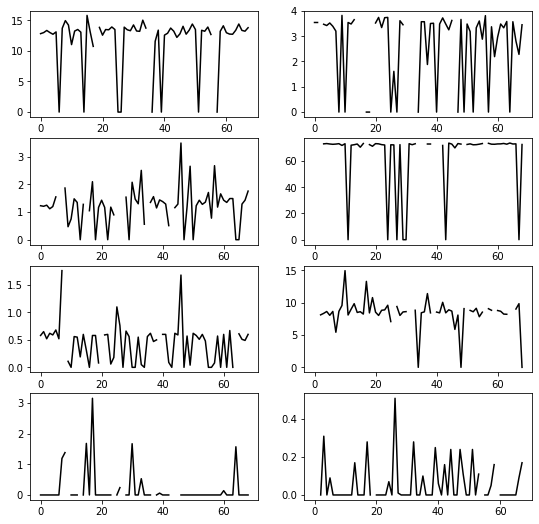

In [22]:
#visualising data

x = np.arange(0, 69, 1)
fig, ax = plt.subplots(4,2, figsize=(9, 9))

ax[0][0].plot(x, eu3['Na'], 'k-')
ax[0][1].plot(x, eu3['Mg'], 'k-')
ax[1][0].plot(x, eu3['Al'], 'k-')
ax[1][1].plot(x, eu3['Si'], 'k-')
ax[2][0].plot(x, eu3[ 'K'], 'k-')
ax[2][1].plot(x, eu3['Ca'], 'k-')
ax[3][0].plot(x, eu3['Ba'], 'k-')
ax[3][1].plot(x, eu3['Fe'], 'k-')

Again, by plotting the data we could see some glasses had a 0 value for silicon which cannot be correct so averages of that column were taken.

In [23]:
eu4 = eu3.copy()
eu4['Si']=eu4['Si'].replace(0,eu4['Si'].mean())
eu4.head(10)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,12.81,3.54,1.23,73.24,0.58,0.0,0.0,0.0,1
1,12.98,3.54,1.21,NaN,0.65,None,0.0,None,1
2,13.33,None,1.25,NaN,0.52,8.12,0.0,0.0,2
3,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
4,12.71,3.42,1.2,73.20,0.59,8.64,0.0,0.0,1
5,13.09,3.52,1.55,72.87,0.68,8.05,0.0,0.09,2
6,0.0,3.39,None,72.64,0.52,8.65,0.0,0.0,3
7,13.69,3.2,None,72.81,1.76,5.43,1.19,0.0,7
8,14.94,0.0,1.87,73.11,None,8.67,1.38,0.0,7
9,14.21,3.82,0.47,71.77,0.11,9.57,None,0.0,1


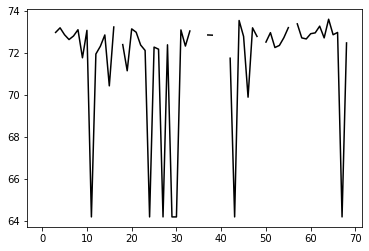

In [24]:
#check values have been replaced
fig, ax = plt.subplots()
x = np.arange(0, 69, 1)
ax.plot(x, eu4['Si'], 'k-')

In [25]:
#replacing NaN values
eu_mean_values = {

    'Na': eu4['Na'].mean(),

    'Mg': eu4['Mg'].mean(),

    'Al': eu4['Al'].mean(),

    'Si': eu4['Si'].mean(),

    'K':   eu4['K'].mean(),

    'Ca': eu4['Ca'].mean(),

    'Ba': eu4['Ba'].mean(),

    'Fe': eu4['Fe'].mean(),

   }

eu5 = eu4.copy().fillna(value=eu_mean_values)
print(f'Data with NaN replaced by the mean:\n\n{eu5}\n')

Data with NaN replaced by the mean:

           Na        Mg    Al         Si         K        Ca    Ba        Fe  \
0   12.810000  3.540000  1.23  73.240000  0.580000  0.000000  0.00  0.000000   
1   12.980000  3.540000  1.21  71.660967  0.650000  8.241864  0.00  0.057812   
2   13.330000  2.552131  1.25  71.660967  0.520000  8.120000  0.00  0.000000   
3   12.990000  3.470000  1.12  72.980000  0.620000  8.350000  0.00  0.310000   
4   12.710000  3.420000  1.20  73.200000  0.590000  8.640000  0.00  0.000000   
..        ...       ...   ...        ...       ...       ...   ...       ...   
64  14.380000  0.000000  0.00  73.610000  0.437692  8.241864  1.57  0.000000   
65  13.340000  3.570000  0.00  72.870000  0.610000  8.241864  0.00  0.000000   
66  13.210000  2.810000  1.29  72.980000  0.510000  9.020000  0.00  0.090000   
67  13.780000  2.280000  1.43  64.174000  0.490000  9.850000  0.00  0.170000   
68  11.677538  3.450000  1.76  72.480000  0.600000  0.000000  0.00  0.057812   

  

In [26]:
eu5.head(10)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,12.81,3.540000,1.23000,73.240000,0.580000,0.000000,0.000000,0.000000,1
1,12.98,3.540000,1.21000,71.660967,0.650000,8.241864,0.000000,0.057812,1
2,13.33,2.552131,1.25000,71.660967,0.520000,8.120000,0.000000,0.000000,2
3,12.99,3.470000,1.12000,72.980000,0.620000,8.350000,0.000000,0.310000,1
4,12.71,3.420000,1.20000,73.200000,0.590000,8.640000,0.000000,0.000000,1
5,13.09,3.520000,1.55000,72.870000,0.680000,8.050000,0.000000,0.090000,2
6,0.00,3.390000,1.24871,72.640000,0.520000,8.650000,0.000000,0.000000,3
7,13.69,3.200000,1.24871,72.810000,1.760000,5.430000,1.190000,0.000000,7
8,14.94,0.000000,1.87000,73.110000,0.437692,8.670000,1.380000,0.000000,7
9,14.21,3.820000,0.47000,71.770000,0.110000,9.570000,0.187258,0.000000,1


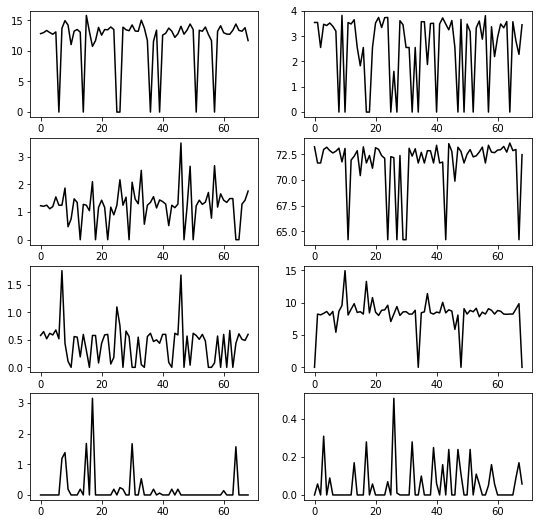

In [27]:
x = np.arange(0, 69, 1)
fig, ax = plt.subplots(4,2, figsize=(9, 9))
#ax.set_xlabel('x')
#ax.set_ylabel('element')
ax[0][0].plot(x, eu5['Na'], 'k-')
ax[0][1].plot(x, eu5['Mg'], 'k-')
ax[1][0].plot(x, eu5['Al'], 'k-')
ax[1][1].plot(x, eu5['Si'], 'k-')
ax[2][0].plot(x, eu5[ 'K'], 'k-')
ax[2][1].plot(x, eu5['Ca'], 'k-')
ax[3][0].plot(x, eu5['Ba'], 'k-')
ax[3][1].plot(x, eu5['Fe'], 'k-')

In [28]:
#concatenating 
data = pd.concat([df2, us3, eu5])
print (data)


           Na    Mg    Al         Si         K        Ca    Ba        Fe Type
0    0.000000  3.82  0.47  71.770000  0.110000  7.325410  0.00  0.000000    1
1   13.270000  0.00  0.00  72.369863  0.470000  0.000000  0.00  0.000000    5
2   13.920000  3.52  1.25  72.880000  0.370000  7.940000  0.00  0.140000    2
3   14.390000  0.00  1.82  72.860000  1.410000  0.000000  2.88  0.000000    7
4    0.000000  0.00  0.71  71.570000  0.020000  0.000000  0.00  0.000000    1
..        ...   ...   ...        ...       ...       ...   ...       ...  ...
64  14.380000  0.00  0.00  73.610000  0.437692  8.241864  1.57  0.000000    7
65  13.340000  3.57  0.00  72.870000  0.610000  8.241864  0.00  0.000000    2
66  13.210000  2.81  1.29  72.980000  0.510000  9.020000  0.00  0.090000    1
67  13.780000  2.28  1.43  64.174000  0.490000  9.850000  0.00  0.170000    2
68  11.677538  3.45  1.76  72.480000  0.600000  0.000000  0.00  0.057812    3

[156 rows x 9 columns]


In [29]:
## separate input and output column names//Creating Input Features and Target Variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]
X, y

(           Na    Mg    Al         Si         K        Ca    Ba        Fe
 0    0.000000  3.82  0.47  71.770000  0.110000  7.325410  0.00  0.000000
 1   13.270000  0.00  0.00  72.369863  0.470000  0.000000  0.00  0.000000
 2   13.920000  3.52  1.25  72.880000  0.370000  7.940000  0.00  0.140000
 3   14.390000  0.00  1.82  72.860000  1.410000  0.000000  2.88  0.000000
 4    0.000000  0.00  0.71  71.570000  0.020000  0.000000  0.00  0.000000
 ..        ...   ...   ...        ...       ...       ...   ...       ...
 64  14.380000  0.00  0.00  73.610000  0.437692  8.241864  1.57  0.000000
 65  13.340000  3.57  0.00  72.870000  0.610000  8.241864  0.00  0.000000
 66  13.210000  2.81  1.29  72.980000  0.510000  9.020000  0.00  0.090000
 67  13.780000  2.28  1.43  64.174000  0.490000  9.850000  0.00  0.170000
 68  11.677538  3.45  1.76  72.480000  0.600000  0.000000  0.00  0.057812
 
 [156 rows x 8 columns],
    Type
 0     1
 1     5
 2     2
 3     7
 4     1
 ..  ...
 64    7
 65    2
 66 

In [30]:
X.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.00,3.82,0.47,71.770000,0.11,7.32541,0.00,0.00
1,13.27,0.00,0.00,72.369863,0.47,0.00000,0.00,0.00
2,13.92,3.52,1.25,72.880000,0.37,7.94000,0.00,0.14
3,14.39,0.00,1.82,72.860000,1.41,0.00000,2.88,0.00
4,0.00,0.00,0.71,71.570000,0.02,0.00000,0.00,0.00


In [31]:
y.head()

,Type
0,1
1,5
2,2
3,7
4,1


In [32]:
y.tail()

,Type
64,7
65,2
66,1
67,2
68,3


In [33]:
X.tail

<bound method NDFrame.tail of            Na    Mg    Al         Si         K        Ca    Ba        Fe
0    0.000000  3.82  0.47  71.770000  0.110000  7.325410  0.00  0.000000
1   13.270000  0.00  0.00  72.369863  0.470000  0.000000  0.00  0.000000
2   13.920000  3.52  1.25  72.880000  0.370000  7.940000  0.00  0.140000
3   14.390000  0.00  1.82  72.860000  1.410000  0.000000  2.88  0.000000
4    0.000000  0.00  0.71  71.570000  0.020000  0.000000  0.00  0.000000
..        ...   ...   ...        ...       ...       ...   ...       ...
64  14.380000  0.00  0.00  73.610000  0.437692  8.241864  1.57  0.000000
65  13.340000  3.57  0.00  72.870000  0.610000  8.241864  0.00  0.000000
66  13.210000  2.81  1.29  72.980000  0.510000  9.020000  0.00  0.090000
67  13.780000  2.28  1.43  64.174000  0.490000  9.850000  0.00  0.170000
68  11.677538  3.45  1.76  72.480000  0.600000  0.000000  0.00  0.057812

[156 rows x 8 columns]>

## CLASSIFICATION

This section details the Classification of the processed data using Logistic Regression, Random Forest Regression, K Nearest Neighbours Classifier and Support Vector Machines.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
#splitting the data


In [36]:

#Train Test Split
# split column in X, y which are the input and output variables respectively

X = X.to_numpy()
y = y.to_numpy()

y = y.ravel()
y=y.astype('int')

# show data
print(f'y:\n{y}\n')
print(f'X:\n{pd.DataFrame(X)}\n') # use DataFrame to improve readability

training_ratio = 0.2
    
n_rows = int(len(X) * training_ratio)


# Do split
# Split the data into Training and Test Set
X_train = X[:n_rows]
X_test = X[n_rows:]
y_train = y[:n_rows]
y_test = y[n_rows:]
    
# reshape x to ensure it is 2D
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

print(f'Training Data:\n{pd.DataFrame(X_train)}\n\n{pd.DataFrame(y_train)}\n')
print(f'Test Data:\n{pd.DataFrame(X_test)}\n\n{pd.DataFrame(y_test)}\n')


y:
[1 5 2 7 1 7 1 3 1 3 7 1 2 3 1 2 2 7 1 5 7 1 2 7 1 2 6 1 3 2 2 1 1 7 3 3 2
 1 2 2 2 1 2 2 2 1 1 7 2 2 1 2 6 6 1 7 2 1 2 1 7 3 1 1 2 5 2 3 1 2 1 1 7 7
 5 1 2 3 2 7 2 3 5 6 2 7 1 1 1 2 1 1 2 3 7 7 1 2 2 1 1 1 7 1 2 2 2 1 1 7 1
 1 2 5 7 2 1 7 2 2 7 2 3 1 5 1 2 1 1 1 1 2 1 5 1 1 7 2 2 2 1 1 2 1 7 1 6 2
 1 2 2 7 2 1 2 3]

X:
             0     1     2          3         4         5     6         7
0     0.000000  3.82  0.47  71.770000  0.110000  7.325410  0.00  0.000000
1    13.270000  0.00  0.00  72.369863  0.470000  0.000000  0.00  0.000000
2    13.920000  3.52  1.25  72.880000  0.370000  7.940000  0.00  0.140000
3    14.390000  0.00  1.82  72.860000  1.410000  0.000000  2.88  0.000000
4     0.000000  0.00  0.71  71.570000  0.020000  0.000000  0.00  0.000000
..         ...   ...   ...        ...       ...       ...   ...       ...
151  14.380000  0.00  0.00  73.610000  0.437692  8.241864  1.57  0.000000
152  13.340000  3.57  0.00  72.870000  0.610000  8.241864  0.00  0.000000
153  13.2

In [37]:
#scaling-Standardizing the Input Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [38]:
#logistic regression

In [39]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [40]:
print(X_train.shape)
print(y_train.shape)

(31, 8)
(31,)


In [41]:
# run algorithm
#y = y_train.ravel()
#y_train= np.array(y).astype(int)
logistic_regressor = LogisticRegression().fit(X_train, y_train)

In [42]:
# get coeffs
print(logistic_regressor.coef_)
print(logistic_regressor.intercept_)

[[-6.06146443e-01  9.11161404e-01 -1.63163623e-01 -1.17619350e-02
   2.56669888e-02 -5.49366415e-01  1.53747505e-01 -9.55791090e-02]
 [-5.34849508e-01 -1.49285241e-01 -2.29752285e-01  5.60713083e-01
   8.84084621e-01  6.16557256e-01 -4.42314502e-01  7.64573966e-01]
 [ 4.00903963e-01  9.47342385e-01 -1.90530696e-01 -6.42882870e-01
  -2.53902707e-01  5.59382630e-01 -5.54013346e-01 -2.61366611e-01]
 [ 2.36776801e-01 -6.89494185e-01  9.73022865e-02  9.30642679e-04
   2.67695181e-01 -1.04265434e+00 -3.56600649e-01 -3.48703207e-01]
 [ 1.39878418e-01 -6.15619737e-01 -1.86155066e-01  6.68165235e-02
  -5.09906160e-01  4.64798188e-01 -2.13863023e-01 -6.12127265e-02]
 [ 3.63436769e-01 -4.04104626e-01  6.72299384e-01  2.61845559e-02
  -4.13637924e-01 -4.87173212e-02  1.41304402e+00  2.28768674e-03]]
[ 1.58015752  0.90535797 -0.00515737 -0.91830702 -1.28699558 -0.27505552]


In [43]:
# measure performance against test data
y_pred = logistic_regressor.predict(X_test)
logistic_regressor.score(X_test, y_test)

0.44

In [44]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[15, 19, 11,  0,  1,  0],
       [10, 26,  3,  2,  0,  1],
       [ 5,  2,  2,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  1],
       [ 0,  4,  1,  1,  0, 12]], dtype=int64)

In [45]:
#random forest

In [46]:
#y = y_train.ravel()
#y_train= np.array(y).astype(int)
Random_Forest_regressor = RandomForestRegressor().fit(X_train, y_train)


The score is: 0.3982


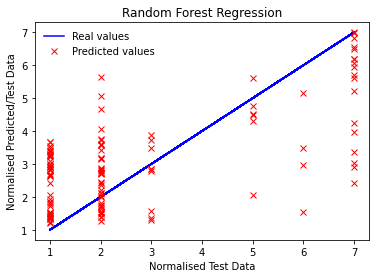

In [47]:
fig, ax = plt.subplots()
ax.plot(y_test, y_test, 'b-', label='Real values')

print(f'The score is: {Random_Forest_regressor.score(X_test, y_test):.4f}')

# use LinearRegression.predict to create some predicted values
y_pred1 = Random_Forest_regressor.predict(X_test)
ax.plot(y_test, y_pred1, 'rx', label='Predicted values')


ax.set_xlabel('Normalised Test Data')
ax.set_ylabel('Normalised Predicted/Test Data')
ax.legend(frameon=False)
ax.set_title('Random Forest Regression')

plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# A class allowing you to run K nearest neigbours for different k values 

class KNNWrapper(KNeighborsClassifier):
    def __init__(self, _k: int, _data: pd.DataFrame, training_fraction: float = 0.1, y_column: str = 'Type'):
        
        # allocate data to attribute
        self.data = _data
        
        # initialise parent class
        super().__init__(_k)
        
        # do splitting
        X_columns = list(data.columns)
        X_columns.remove(y_column)
        n_rows = int(training_fraction * len(self.data))
        
        # allocate X and y to self.X and self.y
        self.X = self.data[X_columns].to_numpy()
        self.y = self.data[y_column].to_numpy()
        
        # get X_train and X_test
        self.X_train = self.X[:n_rows]
        self.X_test = self.X[n_rows:]
        
        # get y_train and y_test
        self.y_train = self.y[:n_rows]
        self.y_test = self.y[n_rows:]
        
        # fit
        self.fit(self.X_train, self.y_train)
        
        # get predicted data and allocate to self.y_pred
        self.y_pred = self.predict(self.X_test)
        
    def get_score(self) -> float:
        return self.score(self.X_test, self.y_test)
        

In [50]:
# The implementation of different k values 
data=data.astype('int')
k_values = list(range(1, 16))
models = []
for k in k_values:
    model = KNNWrapper(k, data)
    models.append(model)

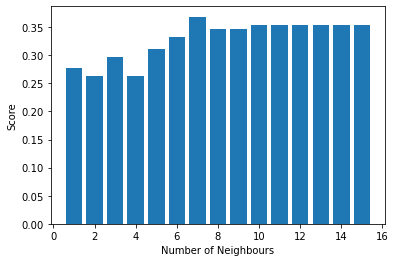

In [51]:
# getting scores for different model values
scores = [model.get_score() for model in models]

# plot result
fig, ax = plt.subplots()
ax.bar(k_values, scores)
ax.set_xlabel('Number of Neighbours')
ax.set_ylabel('Score')

None


In [52]:
# list of different support vector machine models
C = 5.0
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel='rbf', gamma=0.1, C=C),
    svm.SVC(kernel='poly', degree=1.5, gamma='auto', C=C)
)

# x-axis titles
names = [
    'SVC - Linear',
    'LinearSVC',
    'SVC - RBF (0.1)',
    'SVC - Polynomial (1.5)'
]

# fit the models and obtain scores
models = (clf.fit(X_train, y_train) for clf in models)
scores = [clf.score(X_test, y_test) for clf in models]


C:\Users\tf421\AppData\Local\Temp/ipykernel_19984/1385414347.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


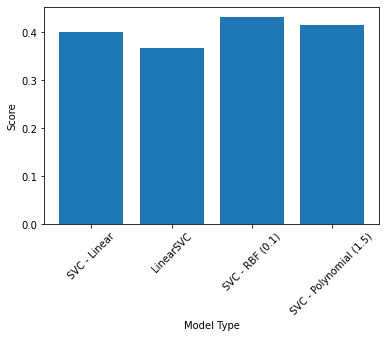

In [53]:
# plot results
fig, ax = plt.subplots()
ax.bar(names, scores)

# axes titles
ax.set_xlabel('Model Type')
ax.set_ylabel('Score')

# rotate labels
ax.set_xticklabels(names, rotation=45)

None

In [54]:
X_test

array([[ 3.48461835e-01,  8.79405390e-01, -3.97770083e-01,
         6.72898669e-01,  6.17726478e-01,  5.42538444e-01,
        -4.89064169e-01, -4.28473024e-01],
       [ 4.33482881e-01, -1.35694022e+00, -4.62499073e-01,
        -1.33927515e-01, -1.00205849e+00,  7.09609039e-01,
        -4.89064169e-01, -4.28473024e-01],
       [ 7.36057781e-01, -1.35694022e+00,  1.67355759e+00,
         1.06091432e+00, -1.18895676e+00,  6.05910049e-01,
         3.33154972e-01, -4.28473024e-01],
       [ 3.55963692e-01,  8.35920892e-01, -1.80290485e-01,
         2.29368012e-01,  5.55427056e-01,  5.88626884e-01,
        -4.89064169e-01, -4.28473024e-01],
       [ 5.31007023e-01,  5.42709752e-02, -1.30397594e+00,
        -1.27768537e-01, -8.46309939e-01,  9.68856515e-01,
        -4.89064169e-01, -4.28473024e-01],
       [ 3.33458121e-01, -1.35694022e+00,  1.36244084e-01,
         7.71442326e-01, -5.26774194e-03,  5.02211059e-01,
        -4.89064169e-01, -4.28473024e-01],
       [-2.97736145e+00,  8.918295

C:\Users\tf421\AppData\Local\Temp/ipykernel_19984/1292002887.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


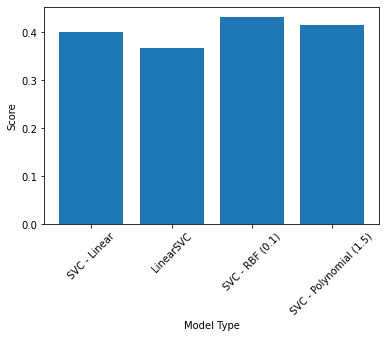

In [55]:
# list of different support vector machine models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
C = 5.0
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel='rbf', gamma=0.1, C=C),
    svm.SVC(kernel='poly', degree=1.5, gamma='auto', C=C)
)

# x-axis titles
names = [
    'SVC - Linear',
    'LinearSVC',
    'SVC - RBF (0.1)',
    'SVC - Polynomial (1.5)'
]

# fit the models and obtain scores
models = (clf.fit(X_train, y_train) for clf in models)
scores = [clf.score(X_test, y_test) for clf in models]

# plot results
fig, ax = plt.subplots()
ax.bar(names, scores)

# axes titles
ax.set_xlabel('Model Type')
ax.set_ylabel('Score')

# rotate labels
ax.set_xticklabels(names, rotation=45)

None




In [56]:
# Support vector machine is the better option than k-nearest neighbours since the SVC have a higher score value than knn

# OPTIMISATION

## SVM

In [57]:
#Optimise SVM
C = 0.5
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
SVM_best=svm.SVC(kernel='rbf', gamma=0.1, C=C)
SVM_best.fit(X_train, y_train)
#Cross val score
from sklearn.model_selection import cross_val_score
score_svm_cv = cross_val_score(SVM_best, X, y, cv=5, scoring='accuracy')
print(score_svm_cv)
print("%0.4f accuracy with a standard deviation of %0.4f" % (score_svm_cv.mean(), score_svm_cv.std()))

[0.40625    0.5483871  0.5483871  0.48387097 0.38709677]
0.4748 accuracy with a standard deviation of 0.0683


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#Stating Parameters
kernel= ['rbf']
C=[0.5,1,5,10,20]
gamma=np.logspace(-9,3,13)
parameters = {'kernel':kernel, 'C': C, 'gamma':gamma}
svm_best = GridSearchCV(estimator = SVM_best, param_grid = parameters, cv = 5, verbose=2)
svm_best.fit(X_train, y_train)
print ('Parameters: ', parameters, '\n')
print ('Best Parameter: ', svm_best.best_params_, ' \n')
ypred_svm=svm_best.predict(X_test)

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV] END .....................C=0.5, gamma=1e-09, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-09, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-09, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-09, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-09, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-08, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-08, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-08, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-08, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-08, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=1e-0

C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV] END .......................C=1, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-06, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ........................C=10, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=1000.0, kernel=rbf; total time=   0.0s
[CV] END ...................

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, ypred_svm, labels=[1, 2, 3]))
Accuracy_Score_SVM=print("Accuracy of SVM: ",accuracy_score(y_test, ypred_svm))

              precision    recall  f1-score   support

           1       0.42      0.93      0.58        46
           2       0.40      0.10      0.15        42
           3       0.00      0.00      0.00         9

   micro avg       0.42      0.48      0.45        97
   macro avg       0.27      0.34      0.24        97
weighted avg       0.37      0.48      0.34        97

Accuracy of SVM:  0.472


C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [60]:
#Optimise Logistic Regression
#Cross Val score
score_logistic_cv = cross_val_score(logistic_regressor, X, y, cv=5, scoring='accuracy')
print(score_logistic_cv)
print("%0.4f accuracy with a standard deviation of %0.4f" % (score_logistic_cv.mean(), score_logistic_cv.std()))

C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.53125    0.5483871  0.5483871  0.51612903 0.5483871 ]
0.5385 accuracy with a standard deviation of 0.0130


In [61]:
#Optimise Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#Stating Parameters
C=[0.001,0.01,0.1,1,10,100]
parameter = {'C': C}

logistic_regressor_best = GridSearchCV(estimator = logistic_regressor,param_grid = parameter, cv = 5, verbose=2)
logistic_regressor_best.fit(X_train, y_train)
print ('Parameters: ', parameter, '\n')
print ('Best Parameter: ', logistic_regressor_best.best_params_, ' \n')
ypred_logistic=logistic_regressor_best.predict(X_test)

C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
print(classification_report(y_test, ypred_logistic, labels=[1, 2, 3]))
print("Accuracy of Logistic: ",accuracy_score(y_test, ypred_logistic))

              precision    recall  f1-score   support

           1       0.45      0.28      0.35        46
           2       0.44      0.50      0.47        42
           3       0.13      0.44      0.21         9

   micro avg       0.36      0.39      0.37        97
   macro avg       0.34      0.41      0.34        97
weighted avg       0.41      0.39      0.39        97

Accuracy of Logistic:  0.384


## Random Forest

In [63]:
#Optimising Random Forest
#Cross val score
#score_rf_cv = cross_val_score(Random_Forest_regressor, X, y, cv=5, scoring='accuracy')
#print(score_rf_cv)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (score_rf_cv.mean(), score_rf_cv.std()))

In [64]:
#Optimising Random Forest

#Stating Parameters
n_estimators=np.arange(100,300,100)
max_depth=np.arange(1,5,1)
min_samples_split=np.arange(2,5,1)
parameters = {'n_estimators': n_estimators,'max_depth': max_depth, 'min_samples_split': min_samples_split}
#Grid Search to find best value for each parameter
Random_Forest_regressor_best = GridSearchCV(estimator = Random_Forest_regressor,param_grid = parameters, cv = 5, verbose=2)
Random_Forest_regressor_best.fit(X_train, y_train)
# Print the best parameters
print ('Parameters: ', parameters, '\n')
print ('Best Parameters: ', Random_Forest_regressor_best.best_params_, ' \n')
#pd.DataFrame(Random_Forest_regressor.Random_Forest_regressor_results_)
#Fit best parameters to model
ypred_RF=Random_Forest_regressor_best.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END .max_depth=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END .max_depth=1, min_samples_split=3, n_e

[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END .max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END .max_depth=4, min_s

In [65]:
#Optimised Score of Random Forest
print(f'The score of Random Forest Regressor is: {Random_Forest_regressor_best.score(X_test, y_test):.4f}')
#print(classification_report(y_test, ypred_RF, labels=[1, 2, 3]))
#print("Accuracy of Logistic: ",accuracy_score(y_test, ypred_RF))

The score of Random Forest Regressor is: 0.4467


## K Nearest Neighbours

In [66]:
#Optimising k-nearest neighbors
#Cross Val Score
KNN= KNeighborsClassifier(n_neighbors=6)
score_knn_cv = cross_val_score(KNN, X, y, cv=5, scoring='accuracy')
print(score_knn_cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_knn_cv.mean(), score_knn_cv.std()))

[0.4375     0.61290323 0.48387097 0.51612903 0.35483871]
0.48 accuracy with a standard deviation of 0.09


In [67]:
#Optimising k-nearest neighbors
#Stating Parameters
leaf_size = np.arange(1,50,1)
n_neighbors=np.arange(1,7,1)
p=[1,2]
KNN=KNeighborsClassifier()
parameter2 = {'leaf_size': leaf_size,'n_neighbors': n_neighbors, 'p': p}
#Grid Search to find best value for each parameter
KNN_best = GridSearchCV(estimator = KNN, param_grid = parameter2, cv = 5, verbose=2)
KNN_best.fit(X_train,y_train)
print ('Parameters: ', parameter2, '\n')
print ('Best Parameters: ', KNN_best.best_params_, ' \n')
#Fit best parameters to model
y_pred_KNN= KNN_best.predict(X_test)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=2, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_n

C:\Users\tf421\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV] END ....................leaf_size=1, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=2; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................

[CV] END ....................leaf_size=3, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=6, p=1; total time=   0.0s
[CV] END ....................leaf_size=3, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................

[CV] END ....................leaf_size=5, n_neighbors=4, p=2; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=1; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=5, p=2; total time=   0.0s
[CV] END ....................leaf_size=5, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................

[CV] END ....................leaf_size=7, n_neighbors=3, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=3, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=3, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=3, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=1; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=1; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=1; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=1; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=1; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=2; total time=   0.0s
[CV] END ....................leaf_size=7, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................

[CV] END ....................leaf_size=9, n_neighbors=2, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=2; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=2; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=2; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=2; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=2, p=2; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=3, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=3, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=3, p=1; total time=   0.0s
[CV] END ....................leaf_size=9, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=11, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=12, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=12, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=13, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=15, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=15, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=16, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=16, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=18, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=18, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=19, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=19, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=19, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=20, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=20, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=20, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=20, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=20, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=20, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=21, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=21, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=21, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=21, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=21, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=21, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=22, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=22, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=24, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=24, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=26, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=26, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=28, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=28, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=30, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=1; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=2, p=2; total time=   0.0s
[CV] END ...................leaf_size=30, n_neighbors=3, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=31, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=31, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=31, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=31, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=31, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=32, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=33, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=33, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=1; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................leaf_size=34, n_neighbors=1, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=35, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=1; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................leaf_size=35, n_neighbors=6, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=37, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=37, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=39, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=39, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=41, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=41, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=43, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=3, p=2; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=43, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=45, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=45, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=47, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=1; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=47, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................

[CV] END ...................leaf_size=49, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=4, p=2; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=1; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................leaf_size=49, n_neighbors=5, p=2; total time=   0.0s
[CV] END ...................

In [68]:
print(classification_report(y_test, y_pred_KNN, labels=[1, 2, 3]))
print("Accuracy of K Nearest Neighbours Classifier: ",accuracy_score(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           1       0.32      0.41      0.36        46
           2       0.41      0.38      0.40        42
           3       0.11      0.11      0.11         9

   micro avg       0.33      0.37      0.35        97
   macro avg       0.28      0.30      0.29        97
weighted avg       0.34      0.37      0.35        97

Accuracy of K Nearest Neighbours Classifier:  0.392


# Graphs

In [69]:
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.widgets
import seaborn as sns

In [70]:
C = 0.5
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
SVM_best=svm.SVC(kernel='rbf', gamma=0.1, C=C)
SVM_best.fit(X_train, y_train)
#Cross val score
from sklearn.model_selection import cross_val_score
score_svm_cv = cross_val_score(SVM_best, X, y, cv=5, scoring='accuracy')
print(score_svm_cv)
print("%0.4f accuracy with a standard deviation of %0.4f" % (score_svm_cv.mean(), score_svm_cv.std()))

[0.40625    0.5483871  0.5483871  0.48387097 0.38709677]
0.4748 accuracy with a standard deviation of 0.0683


In [71]:
%matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.widgets
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

<IPython.core.display.Javascript object>


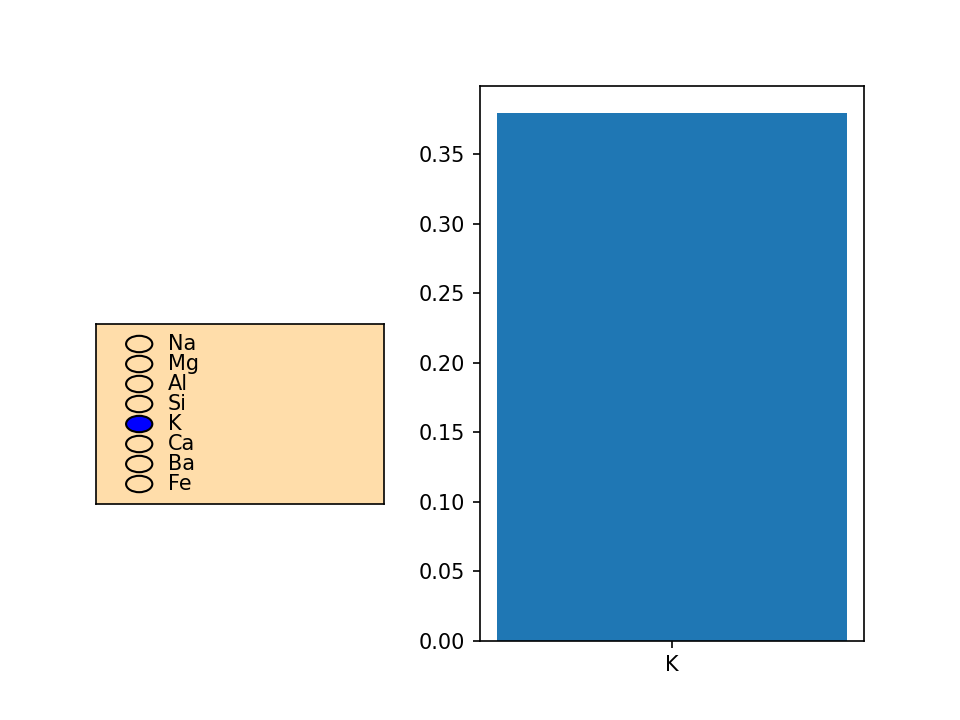

In [72]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons

#create dictionnary where key is the column name and value is accuracy
accuracies = {"Na":0.38,"Mg":0.09,"Al":0.25,"Si":0.31,"K":0.38,"Ca":0.34,"Ba":0.38,"Fe":0.44}

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(accuracies.keys(), accuracies.values())
plt.subplots_adjust(left=0.5)

# Label axes
ax.set_xlabel('Categories')
ax.set_ylabel('Accuracy')

#create check box
ax_cb = plt.axes([0.1, 0.3, 0.3, 0.25], facecolor='#FFDDAA')
cb = RadioButtons(ax_cb, accuracies.keys())



# callback function to run when buttons are pressed

def callback(label):
    """Updating the bar chart"""
    data = {label:accuracies[label]}
    ax.clear()
    ax.bar(data.keys(), data.values())
    plt.show()

 
cb.on_clicked(callback)


plt.show()


In [73]:
#importing dataset

evidence= pd.read_csv("samples.evidence", delimiter=' ')

evidence=evidence.drop(['Exhibit','RI'],axis=1)
evidence

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
1,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00
2,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00
3,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00
4,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
5,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
6,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00
7,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00


In [75]:
SVM_best.predict(evidence)

array([1, 1, 1, 1, 1, 1, 1, 1])

Type 3 glass was not found to be present at the crime scene. The predicted data shows that Type 1 is the glass that was present so the gang are not suspects.